# <h1 style="color:#4F76F7; font-family:courier; text-align:center; font-size:250%; background-color:#B8D5E6;">-- Project: Diagnosing Sickle Cell Anemia --</h1>
<em style="color:#5390E0; font-family:verdana;"> Basado en: https://krother.gitbooks.io/biopython-tutorial/content/sicklecell.html </em>

<ul type=”A”>
  <li style="color:#9189F0; font-family:verdana;">Carlos Michel Mourra Díaz</li>
  <li style="color:#9189F0; font-family:verdana;">Elizabeth Márquez Gómez</li>
  <li style="color:#9189F0; font-family:verdana;">Salvador González Juárez</li>
</ul>

# <h2 style="color:#4FC2F7; font-family:courier;">Ejercicios</h2>
+ <a href="#Ejercicio_1" style="color:#4F76F7; font-family:verdana;">Ejercicio 1</a>
+ <a href="#Ejercicio_2" style="color:#4F76F7; font-family:verdana;">Ejercicio 2</a>
+ <a href="#Ejercicio_3" style="color:#4F76F7; font-family:verdana;">Ejercicio 3</a>
+ <a href="#Ejercicio_4" style="color:#4F76F7; font-family:verdana;">Ejercicio 4</a>

<a id="Ejercicio_1"></a>
<h2 style="color:#5390E0; font-family:courier; background-color:#CCECFF;">1. Retrieving DNA and protein sequences with Bio.Entrez</h2>
<h3 style="color:#4FBAF7; font-family:courier;">1.1 Search identifiers on NCBI</h3>

In [44]:
from Bio import Entrez

#access entrez with an email
Entrez.email = 'elimqzg@lcg.unam.mx'

#Get sequence identifiers from the nucleotide database
handle = Entrez.esearch(db='nucleotide', term='sickle AND homo sapiens AND globin NOT chromosome') 
record = Entrez.read(handle)
print(record['IdList'])

['1868032479', '1515564438', '179408', '224959855', '2168937', '183859', '183844']


<h3 style="color:#4FBAF7; font-family:courier;">1.2 Retrieve sequences using identifiers</h3>

In [45]:
from xml.etree import ElementTree as ET

#loop through identifiers
for identifier in record['IdList']:
    
    #get identifier info in xml format
    handle = Entrez.efetch(db='nucleotide', id= identifier, rettype='fasta', retmode='xml')
    resultXML = handle.read().decode()
    #print(resultXML)
    
    #use ElementTree to parse XML document
    tree = ET.ElementTree(ET.fromstring(resultXML))
    root = tree.getroot()
    
    #retrieve sequence and accesion identifier
    print((root.find('.//TSeq_defline')).text)
    print((root.find('.//TSeq_accver')).text, end='\n\n')
    

Homo sapiens A-gamma globin (HBG1) gene, exon 1 and partial cds
MN609913.1

Homo sapiens voucher ATGLAB 2018103 hemoglobin beta subunit (HBB) gene, exon 3 and partial cds
MH580289.1

Human sickle cell beta-globin mRNA, complete cds
M25079.1

Homo sapiens A-gamma globin (HBG1) gene, promoter region
FJ766333.1

Part of DNA encoding beta-globin gene
E00658.1

Human hemoglobin DNA with a deletion causing Indian delta-beta thalassemia
M33706.1

Human hemoglobin-related sequence across the breakpoint for Indian delta-beta thalassemia
M37467.1



<h3 style="color:#4FBAF7; font-family:courier;">1.3 Retrieve a single GenBank entry</h3>

In [46]:
#retrieve a gb file with identifier
handle = Entrez.efetch(db='nucleotide', id='M25079.1', rettype='gb', retmode='text')
resultText = handle.read()
print(resultText)

LOCUS       HUMBETGLA                468 bp    mRNA    linear   PRI 27-APR-1993
DEFINITION  Human sickle cell beta-globin mRNA, complete cds.
ACCESSION   M25079
VERSION     M25079.1
KEYWORDS    .
SOURCE      Homo sapiens (human)
  ORGANISM  Homo sapiens
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;
            Catarrhini; Hominidae; Homo.
REFERENCE   1  (bases 1 to 468)
  AUTHORS   Marotta,C.A., Forget,B.G., Cohen-Solal,M. and Weissman,S.M.
  TITLE     Nucleotide sequence analysis of coding and noncoding regions of
            human beta-globin mRNA
  JOURNAL   Prog. Nucleic Acid Res. Mol. Biol. 19, 165-175 (1976)
   PUBMED   1019344
COMMENT     Original source text: Human sickle cell, cDNA to mRNA.
FEATURES             Location/Qualifiers
     source          1..468
                     /organism="Homo sapiens"
                     /mol_type="mRNA"
                     /db_xref="ta

<h3 style="color:#4FBAF7; font-family:courier;">1.4 Write an output file</h3>

In [47]:
# put the gb sickecell info into an output file
with open('./sickle.gb','w') as fileHandler:
    fileHandler.write(resultText)

In [48]:
%%bash
less ./sickle.gb

LOCUS       HUMBETGLA                468 bp    mRNA    linear   PRI 27-APR-1993
DEFINITION  Human sickle cell beta-globin mRNA, complete cds.
ACCESSION   M25079
VERSION     M25079.1
KEYWORDS    .
SOURCE      Homo sapiens (human)
  ORGANISM  Homo sapiens
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;
            Catarrhini; Hominidae; Homo.
REFERENCE   1  (bases 1 to 468)
  AUTHORS   Marotta,C.A., Forget,B.G., Cohen-Solal,M. and Weissman,S.M.
  TITLE     Nucleotide sequence analysis of coding and noncoding regions of
            human beta-globin mRNA
  JOURNAL   Prog. Nucleic Acid Res. Mol. Biol. 19, 165-175 (1976)
   PUBMED   1019344
COMMENT     Original source text: Human sickle cell, cDNA to mRNA.
FEATURES             Location/Qualifiers
     source          1..468
                     /organism="Homo sapiens"
                     /mol_type="mRNA"
                     /db_xref="ta

<h3 style="color:#4FBAF7; font-family:courier;">1.5 Retrieve and write multiple GenBank entries</h3>

In [49]:
def GetRecord(resultados, fileFormat):
    '''
    Esta funcion extrae las secuencias Fasta correspondientes a cada uno de los resultados de 
    una busqueda realizada.
    :param resultados: Bio.Entrez.Parser.DictionaryElement, conjunto de resultados para una busqueda usando
                       Entrez.
    :return str, secuencia Fasta del objeto encontrado en la busqueda.
    '''
    
    # Gets the search values
    num_resultados = int(resultados['Count'])
    webenv = resultados['WebEnv']
    query_key = resultados['QueryKey']
    lote = num_resultados

    # start to extract the results in batches
    for inicio in range(0, num_resultados, lote):
        fin = min(num_resultados, inicio + lote)
        
        # Three attemps to extract the results
        intento = 1
        while intento <= 3:
            try:
                                
                # Get results with Fasta format
                fetch_handler= Entrez.efetch(db='nucleotide', rettype=fileFormat, retmode='text',
                                             retstart=inicio, retmax=lote,
                                             webenv=webenv, query_key=query_key)
                break
            
            # In case of an error return it
            except HTTPError as err:
                
                # If the error is from server, wait and try again
                if 500 <= err.code <= 599:
                    print('Error del servidor: {}'.format(err))
                    print('Intento {} de 3'.format(intento))
                    intento += 1
                    time.sleep(15)
                
                # If the error isn't from server,stop and raise error
                else:
                    raise

        # save results and return it
        record = fetch_handler.read()
        fetch_handler.close()
        
        return record
    
# open file to write sequences  
out_handler = open('./entries.gb', 'w+')
out_handler.write('')
out_handler.close()   

# search Homo sapiens beta-globing codings sequences
searchHandler = Entrez.esearch(db='nucleotide',term='((beta-globin[Keyword]) AND Homo sapiens[Organism]) AND complete cds[TI] ', usehistory='y')
searchResults = Entrez.read(searchHandler)

#write sequences    
with open('./entries.gb','a') as docEntriesGb:
    docEntriesGb.write(GetRecord(searchResults,'gb'))
    

In [50]:
%%bash
head ./entries.gb

LOCUS       AH001475                4355 bp    DNA     linear   PRI 10-JUN-2016
DEFINITION  Homo sapiens beta-globin gene, complete cds.
ACCESSION   AH001475 M34058 M34059
VERSION     AH001475.2
KEYWORDS    beta-globin.
SOURCE      Homo sapiens (human)
  ORGANISM  Homo sapiens
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;
            Catarrhini; Hominidae; Homo.


<h3 style="color:#4FBAF7; font-family:courier;">1.6 Optional Exercises</h3>
<h4 style="color:#55D4ED; font-family:courier;">1.6.1 Save the retrieved entries to a single FASTA file.</h4>

In [51]:
# open new file 
out_handler = open('./entries.fasta', 'w+')
out_handler.write('')
out_handler.close()

# write all entries in a single fasta
with open('./entries.fasta','a') as docEntriesFasta:
    docEntriesFasta.write(GetRecord(searchResults,'fasta'))

In [52]:
%%bash
head ./entries.fasta

>AH001475.2 Homo sapiens beta-globin gene, complete cds
TCTATTTATTTAGCAATAATAGAGAAAGCATTTAAGAGAATAAAGCAATGGAAATAAGAAATTTGTAAAT
TTCCTTCTGATAACTAGAAATAGAGGATCCAGTTTCTTTTGGTTAACCTAAATTTTATTTCATTTTATTG
TTTTATTTTATTTTATTTTATTTTATTTTATTTTGTGTAATCGTAGTTTCAGAGTGTTAGAGCTGAAAGG
AAGAAGTAGGAGAAACATGCAAAGTAAAAGTATAACACTTTCCTTACTAAACCGACATGGGTTTCCAGGT
AGGGGCAGGATTCAGGATGACTGACAGGGCCCTTAGGGAACACTGAGACCCTACGCTGACCTCATAAATG
CTTGCTACCTTTGCTGTTTTAATTACATCTTTTAATAGCAGGAAGCAGAACTCTGCACTTCAAAAGTTTT
TCCTCACCTGAGGAGTTAATTTAGTACAAGGGGAAAAAGTACAGGGGGATGGGAGAAAGGCGATCACGTT
GGGAAGCTATAGAGAAAGAAGAGTAAATTTTAGTAAAGGAGGTTTAAACAAACAAAATATAAAGAGAAAT
AGGAACTTGAATCAAGGAAATGATTTTAAAACGCAGTATTCTTAGTGGACTAGAGGAAAAAAATAATCTG


<h4 style="color:#55D4ED; font-family:courier;">1.6.2 Save each of the beta-globin sequences to a separate GenBank file.</h4>

In [54]:
#Create directory
#%%bash
#mkdir betaglobin_gbfiles

In [55]:
from Bio import SeqIO

counter = 1

# parse genebank file from 1.5 and get each sequence
for gbRecord in SeqIO.parse('./entries.gb', 'genbank'):
    
    # write each sequence in defferent gb files
    file = open("./betaglobin_gbfiles/globinRecord_{}.gb".format(counter),"w+")
    file.write(str(gbRecord))
    counter += 1
    file.close()
        
           

In [56]:
%%bash
head ./betaglobin_gbfiles/globinRecord_1.gb

ID: AH001475.2
Name: AH001475
Description: Homo sapiens beta-globin gene, complete cds
Number of features: 13
/molecule_type=DNA
/topology=linear
/data_file_division=PRI
/date=10-JUN-2016
/accessions=['AH001475', 'M34058', 'M34059']
/sequence_version=2


<h4 style="color:#55D4ED; font-family:courier;">1.6.3 Use Entrez to search 100 recent references related to malaria and sickle cell anemia on PubMed.</h4>

In [57]:
# search articles related to an association between sickle cell anemia and malaria
handle = Entrez.esearch(db="pubmed", term="(malaria) AND (sickle cell anemia)", retmax=100)
record = Entrez.read(handle)

record['IdList']

['33531281', '33524905', '33424841', '33261264', '33238928', '33180011', '33177908', '33008877', '32716940', '32697331', '32646433', '32614730', '32579813', '32491454', '32409247', '32391975', '32348635', '32334583', '32265284', '32211753', '32189304', '32183478', '32043441', '32019737', '31999737', '31959596', '31937250', '31933570', '31889707', '31815023', '31808910', '31794569', '31703724', '31692839', '31681984', '31656474', '31562022', '31546868', '31518428', '31470113', '31288760', '31167999', '31084943', '31037173', '31029083', '30923098', '30827499', '30787300', '30665411', '30658602', '30657108', '30605461', '30595467', '30578732', '30541465', '30501550', '30472238', '30455821', '30425067', '30411430', '30393954', '30344128', '30245824', '30222732', '30200838', '30178476', '30165857', '30145110', '30060095', '29946035', '29801034', '29749368', '29609623', '29607473', '29599243', '29588281', '29579313', '29524230', '29489205', '29408573', '29321025', '29318647', '29313430', '29

<a id="Ejercicio_2"></a>
<h2 style="color:#5390E0; font-family:courier; background-color:#CCECFF;">2. Bio.SeqIO - Reading, writing, and filtering sequence files</h2>
<h3 style="color:#4FBAF7; font-family:courier;">2.1 Read a GenBank file</h3>

In [58]:
from Bio import SeqIO

# read the sickle cell anemia genebank file
for gbRecord in SeqIO.parse('./sickle.gb', 'genbank'):
    print(gbRecord)

ID: M25079.1
Name: HUMBETGLA
Description: Human sickle cell beta-globin mRNA, complete cds
Number of features: 2
/molecule_type=mRNA
/topology=linear
/data_file_division=PRI
/date=27-APR-1993
/accessions=['M25079']
/sequence_version=1
/keywords=['']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Nucleotide sequence analysis of coding and noncoding regions of human beta-globin mRNA', ...)]
/comment=Original source text: Human sickle cell, cDNA to mRNA.
Seq('ATGGTNCAYYTNACNCCNGTGGAGAAGTCYGCYGTNACNGCNCTNTGGGGYAAG...TTT')


<h3 style="color:#4FBAF7; font-family:courier;">2.2 Print information for one sequence</h3>

In [59]:
#parse sicle cell genebank file
for gbRecord in SeqIO.parse('./sickle.gb', 'genbank'):
    
    #get sequence id, name and description
    print(gbRecord.id)
    print(gbRecord.name)
    print(gbRecord.description)
    sickleCell = gbRecord


M25079.1
HUMBETGLA
Human sickle cell beta-globin mRNA, complete cds


<h3 style="color:#4FBAF7; font-family:courier;">2.3 Write a FASTA file</h3>

In [60]:
# write sickle cell anemia info in fasta file format
SeqIO.write(gbRecord, './file_ex2.fasta', 'fasta')


1

In [61]:
%%bash
less ./file_ex2.fasta

>M25079.1 Human sickle cell beta-globin mRNA, complete cds
ATGGTNCAYYTNACNCCNGTGGAGAAGTCYGCYGTNACNGCNCTNTGGGGYAAGGTNAAY
GTGGATGAAGYYGGYGGYGAGGCCCTGGGCAGNCTGCTNGTGGTCTACCCTTGGACCCAG
AGGTTCTTNGANTCNTTYGGGGATCTGNNNACNCCNGANGCAGTTATGGGCAACCCTAAG
GTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGAC
AACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTNCAYGTGGAT
CCTGAGAACTTCAGGCTNCTNGGCAACGTGYTNGTCTGYGTGCTGGCCCATCACTTTGGC
AAAGAATTCACCCCACCAGTGCANGCNGCCTATCAGAAAGTGGTNGCTGGTGTNGCTAAT
GCCCTGGCCCACAAGTATCACTAAGCTNGCYTTYTTGYTGTCCAATTT


<h3 style="color:#4FBAF7; font-family:courier;">2.4 Print information for multiple sequences</h3>

In [62]:
#loop through the sequences in the sickle cell anemia gene bank file
for gbRecord in SeqIO.parse('./entries.gb', 'genbank'):
    
    #get id, name, and description of all human beta-globins
    print(gbRecord.id)
    print(gbRecord.name)
    print(gbRecord.description, end='\n\n')

AH001475.2
AH001475
Homo sapiens beta-globin gene, complete cds

L26478.1
HUMBETGLOR
Human haplotype D3 beta-globin gene, complete cds

L26477.1
HUMBETGLOP
Human haplotype D2 beta-globin gene, complete cds

L26476.1
HUMBETGLOO
Human haplotype D1 beta-globin gene, complete cds

L26475.1
HUMBETGLON
Human haplotype C2 beta-globin gene, complete cds

L26474.1
HUMBETGLOM
Human haplotype C3 beta-globin gene, complete cds

L26473.1
HUMBETGLOL
Human haplotype C1 beta-globin gene, complete cds

L26472.1
HUMBETGLOK
Human haplotype B6 beta-globin gene, complete cds

L26471.1
HUMBETGLOJ
Human haplotype B5 beta-globin gene, complete cds

L26470.1
HUMBETGLOI
Human haplotype B4 beta-globin gene, complete cds

L26469.1
HUMBETGLOH
Human haplotype B3 beta-globin gene, complete cds

L26468.1
HUMBETGLOG
Human haplotype B2 beta-globin gene, complete cds

L26467.1
HUMBETGLOF
Human haplotype B1 beta-globin gene, complete cds

L26466.1
HUMBETGLOE
Human haplotype A4 beta-globin gene, complete cds

L26465.1
HUM

<h3 style="color:#4FBAF7; font-family:courier;">2.5 Filtering sequence entries</h3>

In [63]:
import re

#loop through the sequences in the sickle cell anemia gene bank file
for gbRecord in SeqIO.parse('./entries.gb', 'genbank'):
    
    # don't show non-globin entries, ignore vector or isolate entries
    if not re.search('(isolate)|(vector)', gbRecord.description) and re.search('globin', gbRecord.description):
        
        # get id,name and description
        print(gbRecord.id)
        print(gbRecord.name)
        print(gbRecord.description, end='\n\n')

AH001475.2
AH001475
Homo sapiens beta-globin gene, complete cds

L26478.1
HUMBETGLOR
Human haplotype D3 beta-globin gene, complete cds

L26477.1
HUMBETGLOP
Human haplotype D2 beta-globin gene, complete cds

L26476.1
HUMBETGLOO
Human haplotype D1 beta-globin gene, complete cds

L26475.1
HUMBETGLON
Human haplotype C2 beta-globin gene, complete cds

L26474.1
HUMBETGLOM
Human haplotype C3 beta-globin gene, complete cds

L26473.1
HUMBETGLOL
Human haplotype C1 beta-globin gene, complete cds

L26472.1
HUMBETGLOK
Human haplotype B6 beta-globin gene, complete cds

L26471.1
HUMBETGLOJ
Human haplotype B5 beta-globin gene, complete cds

L26470.1
HUMBETGLOI
Human haplotype B4 beta-globin gene, complete cds

L26469.1
HUMBETGLOH
Human haplotype B3 beta-globin gene, complete cds

L26468.1
HUMBETGLOG
Human haplotype B2 beta-globin gene, complete cds

L26467.1
HUMBETGLOF
Human haplotype B1 beta-globin gene, complete cds

L26466.1
HUMBETGLOE
Human haplotype A4 beta-globin gene, complete cds

L26465.1
HUM

<h3 style="color:#4FBAF7; font-family:courier;">2.6 Optional Exercises</h3>
<h4 style="color:#55D4ED; font-family:courier;">2.6.1 Collect the entries matching all criteria in a new list</h4>

In [64]:
gbs = []

# loop through the sequences in the sickle cell anemia gene bank file
for gbRecord in SeqIO.parse('./entries.gb', 'genbank'):
    
    # ignore vector and isolate entries
    if not re.search('(isolate)|(vector)', gbRecord.description) and re.search('globin', gbRecord.description):
        
        #append genebank object into a list
        gbs.append(gbRecord)
print(gbs)

[SeqRecord(seq=Seq('TCTATTTATTTAGCAATAATAGAGAAAGCATTTAAGAGAATAAAGCAATGGAAA...AAA'), id='AH001475.2', name='AH001475', description='Homo sapiens beta-globin gene, complete cds', dbxrefs=[]), SeqRecord(seq=Seq('ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTA...ATC'), id='L26478.1', name='HUMBETGLOR', description='Human haplotype D3 beta-globin gene, complete cds', dbxrefs=[]), SeqRecord(seq=Seq('ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTA...ATC'), id='L26477.1', name='HUMBETGLOP', description='Human haplotype D2 beta-globin gene, complete cds', dbxrefs=[]), SeqRecord(seq=Seq('ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTA...ATC'), id='L26476.1', name='HUMBETGLOO', description='Human haplotype D1 beta-globin gene, complete cds', dbxrefs=[]), SeqRecord(seq=Seq('ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTA...ATC'), id='L26475.1', name='HUMBETGLON', description='Human haplotype C2 beta-globin gene, complete cds', dbxrefs=[]), SeqRecord(seq=Seq('ACCTCCTATTT

<h4 style="color:#55D4ED; font-family:courier;">2.6.2 Save the filtered list to a FASTA file</h4>

In [65]:
#open new fasta file
out_handler = open('./filter_globin.fasta', 'w+')
out_handler.write('')
out_handler.close()


with open('./filter_globin.fasta','a') as docEntriesFasta:
    
    #loop through the list sequences
    for gbRecord in gbs:
        
        # write sequence and info into the fasta file
        SeqIO.write(gbRecord, docEntriesFasta, "fasta")

In [66]:
%%bash
head ./filter_globin.fasta

>AH001475.2 Homo sapiens beta-globin gene, complete cds
TCTATTTATTTAGCAATAATAGAGAAAGCATTTAAGAGAATAAAGCAATGGAAATAAGAA
ATTTGTAAATTTCCTTCTGATAACTAGAAATAGAGGATCCAGTTTCTTTTGGTTAACCTA
AATTTTATTTCATTTTATTGTTTTATTTTATTTTATTTTATTTTATTTTATTTTGTGTAA
TCGTAGTTTCAGAGTGTTAGAGCTGAAAGGAAGAAGTAGGAGAAACATGCAAAGTAAAAG
TATAACACTTTCCTTACTAAACCGACATGGGTTTCCAGGTAGGGGCAGGATTCAGGATGA
CTGACAGGGCCCTTAGGGAACACTGAGACCCTACGCTGACCTCATAAATGCTTGCTACCT
TTGCTGTTTTAATTACATCTTTTAATAGCAGGAAGCAGAACTCTGCACTTCAAAAGTTTT
TCCTCACCTGAGGAGTTAATTTAGTACAAGGGGAAAAAGTACAGGGGGATGGGAGAAAGG
CGATCACGTTGGGAAGCTATAGAGAAAGAAGAGTAAATTTTAGTAAAGGAGGTTTAAACA


<h4 style="color:#55D4ED; font-family:courier;">2.6.3 Filter the list of sequence entries even further using your own criteria</h4>

In [67]:

#Filter those sequence entries that start with L
for gbRecord in gbs:
    if (gbRecord.id).startswith("L"):
        print(gbRecord.id)

L26478.1
L26477.1
L26476.1
L26475.1
L26474.1
L26473.1
L26472.1
L26471.1
L26470.1
L26469.1
L26468.1
L26467.1
L26466.1
L26465.1
L26464.1
L26463.1
L26462.1


<a id="Ejercicio_3"></a>
<h2 style="color:#5390E0; font-family:courier; background-color:#CCECFF;">3. Bio.Seq and Bio.SeqRecord - Working with sequences</h2>
<h3 style="color:#4FBAF7; font-family:courier;">3.1 The DNA sequence</h3>

In [68]:
#get nucleotide sequence from genebank object
seqSickle = sickleCell.seq
print(seqSickle)


ATGGTNCAYYTNACNCCNGTGGAGAAGTCYGCYGTNACNGCNCTNTGGGGYAAGGTNAAYGTGGATGAAGYYGGYGGYGAGGCCCTGGGCAGNCTGCTNGTGGTCTACCCTTGGACCCAGAGGTTCTTNGANTCNTTYGGGGATCTGNNNACNCCNGANGCAGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTNCAYGTGGATCCTGAGAACTTCAGGCTNCTNGGCAACGTGYTNGTCTGYGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCANGCNGCCTATCAGAAAGTGGTNGCTGGTGTNGCTAATGCCCTGGCCCACAAGTATCACTAAGCTNGCYTTYTTGYTGTCCAATTT


<h3 style="color:#4FBAF7; font-family:courier;">3.2 Transcribe DNA to RNA</h3>

In [69]:
#use the biopython function for transcribe DNA sickle cell sequence 
rnaSickle = seqSickle.transcribe()
print(rnaSickle)

AUGGUNCAYYUNACNCCNGUGGAGAAGUCYGCYGUNACNGCNCUNUGGGGYAAGGUNAAYGUGGAUGAAGYYGGYGGYGAGGCCCUGGGCAGNCUGCUNGUGGUCUACCCUUGGACCCAGAGGUUCUUNGANUCNUUYGGGGAUCUGNNNACNCCNGANGCAGUUAUGGGCAACCCUAAGGUGAAGGCUCAUGGCAAGAAAGUGCUCGGUGCCUUUAGUGAUGGCCUGGCUCACCUGGACAACCUCAAGGGCACCUUUGCCACACUGAGUGAGCUGCACUGUGACAAGCUNCAYGUGGAUCCUGAGAACUUCAGGCUNCUNGGCAACGUGYUNGUCUGYGUGCUGGCCCAUCACUUUGGCAAAGAAUUCACCCCACCAGUGCANGCNGCCUAUCAGAAAGUGGUNGCUGGUGUNGCUAAUGCCCUGGCCCACAAGUAUCACUAAGCUNGCYUUYUUGYUGUCCAAUUU


<h3 style="color:#4FBAF7; font-family:courier;">3.3 Translate RNA to protein</h3>

In [70]:
#use the biopython function for translate RNA sickle cell transcript
protSickle = rnaSickle.translate(to_stop=True)
print(protSickle)

MVHXTPVEKSAVTALWGKVNVDEXGGEALGXLLVVYPWTQRFXXSFGDLXTPXAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVXVCVLAHHFGKEFTPPVXAAYQKVVAGVANALAHKYH


<h3 style="color:#4FBAF7; font-family:courier;">3.4 Analyze annotations of beta-globin</h3>

In [71]:
#open file of beta-globins.
with open ('./L26462.gb', 'w+') as handler:
    
    #loop through all globins
    for gbRecord in SeqIO.parse('./entries.gb', 'genbank'):
        access = gbRecord.annotations['accessions']
        
        #search beta-globin with accesion L26462
        if access[0] == 'L26462':
            L26462 = gbRecord
            handler.write(str(L26462))
        

In [72]:
%%bash
less ./L26462.gb

ID: L26462.1
Name: HUMBETGLOA
Description: Human haplotype C4 beta-globin gene, complete cds
Number of features: 26
/molecule_type=DNA
/topology=linear
/data_file_division=PRI
/date=26-AUG-1994
/accessions=['L26462']
/sequence_version=1
/keywords=['beta-globin']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Molecular and population genetic analysis of allelic sequence diversity at the human beta-globin locus', ...)]
Seq('ACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTA...ATC')

<h3 style="color:#4FBAF7; font-family:courier;">3.5 Extract sequence features</h3>

In [73]:
#access into sequence features with the field r.features
print(L26462.features)

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(3002), strand=1), type='source'), SeqFeature(FeatureLocation(ExactPosition(110), ExactPosition(111), strand=1), type='variation'), SeqFeature(FeatureLocation(ExactPosition(262), ExactPosition(263), strand=1), type='variation'), SeqFeature(FeatureLocation(ExactPosition(272), ExactPosition(273), strand=1), type='variation'), SeqFeature(FeatureLocation(ExactPosition(285), ExactPosition(287), strand=1), type='variation'), SeqFeature(FeatureLocation(ExactPosition(287), ExactPosition(288), strand=1), type='variation'), SeqFeature(FeatureLocation(ExactPosition(294), ExactPosition(296), strand=1), type='variation'), SeqFeature(FeatureLocation(ExactPosition(346), ExactPosition(347), strand=1), type='variation'), SeqFeature(FeatureLocation(ExactPosition(475), ExactPosition(476), strand=1), type='variation'), SeqFeature(FeatureLocation(ExactPosition(499), ExactPosition(500), strand=1), type='variation'), SeqFeature(CompoundLocation([Feat

<h3 style="color:#4FBAF7; font-family:courier;">3.6 Extract exons</h3>

In [74]:
#initialize empty string
completeExon = ''

#loop through sequence features 
for feature in L26462.features:
    
    #filter exons
    if feature.type == 'exon':
        print(feature)
        
        #get start and end exon positions
        print('\tstart: ',feature.location.start)
        print('\tend: ',feature.location.end)
        
        #use nofuzzy function for extract the interval
        print('\tnofuzzy_start: ',feature.location.nofuzzy_start)
        nfStart = feature.location.nofuzzy_start
        print('\tnofuzzy_end: ',feature.location.nofuzzy_end)
        nfEnd = feature.location.nofuzzy_end
        
        #get the exon by indexing the start and end positions
        exon = L26462.seq[nfStart:nfEnd]
        print(exon, end='\n--------------------\n')
        
        #paste all exons to get the healthy globin sequence
        completeExon += exon

print(completeExon)

type: exon
location: [<865:957](+)
qualifiers:
    Key: number, Value: ['1']

	start:  <865
	end:  957
	nofuzzy_start:  865
	nofuzzy_end:  957
ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAG
--------------------
type: exon
location: [1087:1310](+)
qualifiers:
    Key: number, Value: ['2']

	start:  1087
	end:  1310
	nofuzzy_start:  1087
	nofuzzy_end:  1310
GCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGG
--------------------
type: exon
location: [2160:>2289](+)
qualifiers:
    Key: number, Value: ['3']

	start:  2160
	end:  >2289
	nofuzzy_start:  2160
	nofuzzy_end:  2289
CTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAA
--------------------
ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGC

<h3 style="color:#4FBAF7; font-family:courier;">3.7 Extract the beta-globin protein sequence</h3>

In [75]:
seqGlobin = completeExon

#transcribe the healthy globin sequence with the biopython function
rnaGlobin = seqGlobin.transcribe()
print(rnaGlobin)
print('----------')

#get the healthy globin protein sequence 
protGlobin = rnaGlobin.translate(to_stop=True)
print(protGlobin)

AUGGUGCAUCUGACUCCUGAGGAGAAGUCUGCCGUUACUGCCCUGUGGGGCAAGGUGAACGUGGAUGAAGUUGGUGGUGAGGCCCUGGGCAGGCUGCUGGUGGUCUACCCUUGGACCCAGAGGUUCUUUGAGUCCUUUGGGGAUCUGUCCACUCCUGAUGCUGUUAUGGGCAACCCUAAGGUGAAGGCUCAUGGCAAGAAAGUGCUCGGUGCCUUUAGUGAUGGCCUGGCUCACCUGGACAACCUCAAGGGCACCUUUGCCACACUGAGUGAGCUGCACUGUGACAAGCUGCACGUGGAUCCUGAGAACUUCAGGCUCCUGGGCAACGUGCUGGUCUGUGUGCUGGCCCAUCACUUUGGCAAAGAAUUCACCCCACCAGUGCAGGCUGCCUAUCAGAAAGUGGUGGCUGGUGUGGCUAAUGCCCUGGCCCACAAGUAUCACUAA
----------
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH


<h3 style="color:#4FBAF7; font-family:courier;">3.8 Results</h3>

In [76]:
# compare the sickle cell DNA sequence with the healthy globin DNA sequence
print(seqSickle)
print('----------')
print(seqGlobin)

ATGGTNCAYYTNACNCCNGTGGAGAAGTCYGCYGTNACNGCNCTNTGGGGYAAGGTNAAYGTGGATGAAGYYGGYGGYGAGGCCCTGGGCAGNCTGCTNGTGGTCTACCCTTGGACCCAGAGGTTCTTNGANTCNTTYGGGGATCTGNNNACNCCNGANGCAGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTNCAYGTGGATCCTGAGAACTTCAGGCTNCTNGGCAACGTGYTNGTCTGYGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCANGCNGCCTATCAGAAAGTGGTNGCTGGTGTNGCTAATGCCCTGGCCCACAAGTATCACTAAGCTNGCYTTYTTGYTGTCCAATTT
----------
ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAA


In [77]:
#compare the sickle cell protein sequence with the healthy globin protein sequence
print(protSickle)
print('----------')
print(protGlobin)

MVHXTPVEKSAVTALWGKVNVDEXGGEALGXLLVVYPWTQRFXXSFGDLXTPXAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVXVCVLAHHFGKEFTPPVXAAYQKVVAGVANALAHKYH
----------
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH


 <p style="color:#525F66; font-family:verdana; font-size:100%;">Se puede observar una mutación en el aminoácido de la posición 7, ya que en la proteína de la célula con anemia se encuentra una Valina, mientras en la proteína de la célula sana se encuentra un Ácido glutámico.</p>

<h3 style="color:#4FBAF7; font-family:courier;">3.9 Optional Exercises</h3>
<h4 style="color:#55D4ED; font-family:courier;">3.9.1 What are the ‘N’ characters in the sickle cell globin cDNA? How did they affect the transcription/translation?</h4>

<p style="color:#525F66; font-family:verdana; font-size:100%;">Es una literal que puede tomar la identidad de cualquier base canónica.</p>

<p style="color:#525F66; font-family:verdana; font-size:100%;">En la transcripción genera bases con las letras N, mientras que en la traducción se van a generar aminoacidos incognitos</p>

<h4 style="color:#55D4ED; font-family:courier;">3.9.2 Check in the documentation how to read an alignment of multiple sequences using Biopython</h4>

<p style="color:#525F66; font-family:verdana; font-size:100%;">Esto se puede lograr con el modulo AlignIO, a continuación presentamos un ejemplo:</p>

In [78]:
#from Bio import AlignIO

#Read alignment with AlignIO module
#alignment = AlignIO.read(open("PF09395_seed.sth"), "stockholm")
#print("Alignment length %i" % alignment.get_alignment_length())

#loop all alignments in the file
#for record in alignment:
    #print(record.seq + " " + record.id)

<h4 style="color:#55D4ED; font-family:courier;">3.9.3 Propose a PCR primer that specifically recognizes the sickle cell gene</h4>

In [79]:
from Bio.SeqUtils import GC

#get primers with the first 18 base pairs
coincidence = re.findall(str(seqSickle[6:24]),str(seqSickle))

#check that the primer is found only once in the sequence
print("El numero de apariciones de la secuencia {} es {}".format(coincidence,len(coincidence)))

#get the primer reverse complement
primer = seqSickle[6:24].reverse_complement()
print(seqGlobin[6:24],end="\n-------\n")
print(seqSickle[6:24],end="\n-------\n")
print(primer)

#check that the primer have an appropiate GC content
print(GC(primer))


El numero de apariciones de la secuencia ['CAYYTNACNCCNGTGGAG'] es 1
CATCTGACTCCTGAGGAG
-------
CAYYTNACNCCNGTGGAG
-------
CTCCACNGGNGTNARRTG
44.44444444444444


<p style="color:#525F66; font-family:verdana; font-size:100%;">Un primer requiere ser la reversa complementaria de la región donde se encuentra la mutación. Nuestro primer se encuentra una sola vez en la secuencia, tiene una longitud aceptada para el rango adecuado de 18-30 bases y su contenido de GC es óptimo ya que se encuentra entre un rango de 40%-60%.</p>

<a id="Ejercicio_4"></a>
<h2 style="color:#5390E0; font-family:courier; background-color:#CCECFF;">4. Pattern Matching</h2>
<h3 style="color:#4FBAF7; font-family:courier;">4.1 Familiarize with Regular Expressions</h3>

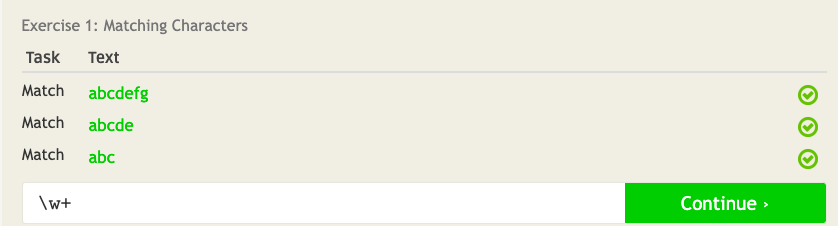

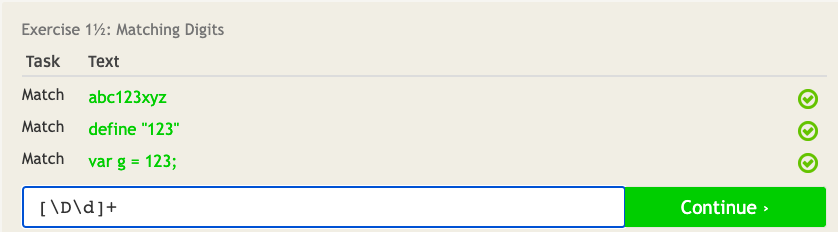

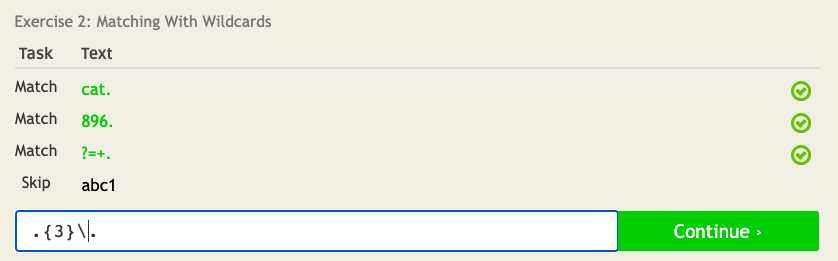

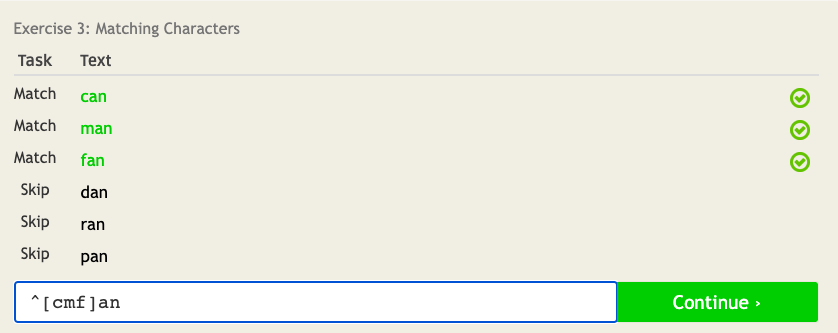

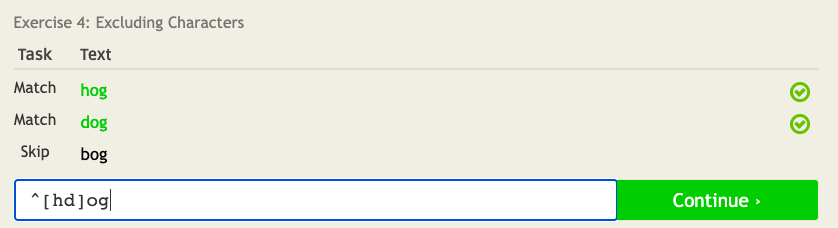

<h3 style="color:#4FBAF7; font-family:courier;">4.2 Search for a start codon</h3>

In [80]:
#search start codon in sequence with regular expressions
match = re.search('ATG', str(seqGlobin))
if match:
    print(match.start(),'-', match.end()-1)

0 - 2


<h3 style="color:#4FBAF7; font-family:courier;">4.3 Search for a restriction site</h3>

In [81]:
def CutDNA(restEnz, seq):
    #loop through all restriction sites in sequence
    for m in re.finditer(restEnz, str(seq)):
        #print the positions and remaining fragment after cut
        print('%02d-%02d: %s' % (m.start(), m.end(), m.group(0)))

#compile the regex of the restriction site
Ddel = re.compile('[ATGC]{2}CT[ATGC]AG')

#get cuts in healthy globin
print('Cortes en sano')
CutDNA(Ddel, str(seqGlobin))

#get cuts in sickle cell anemia globin
print('\nCortes en enfermo')
CutDNA(Ddel, str(seqSickle))



Cortes en sano
14-21: TCCTGAG
173-180: CCCTAAG
262-269: CACTGAG
299-306: TCCTGAG

Cortes en enfermo
173-180: CCCTAAG
262-269: CACTGAG
299-306: TCCTGAG
438-445: CACTAAG


<h3 style="color:#4FBAF7; font-family:courier;">4.4 Try more restriction enzymes</h3>

In [82]:
#for more restriction sites we use a dictionary with enzymes as keys and restriction site regex as values
reDb = {'Ddel': re.compile('[ATGC]{2}CT[ATGC]AG'),
        'HinfI': re.compile('GT[ATGC]{2}AC'),
        'BceAI': re.compile('ACGGC[ATGC]{13}'),
        'BseRI': re.compile('GAGGAG[ATGC]{10}'),
        'EcoRI': re.compile('GAATTC'),
        'MstII': re.compile('CCT[ATGC]{1}AGG')}

In [83]:
#loop through dictionary keys
for enzyme in reDb:
    print(enzyme)
    
    #do the cut for each enzyme
    print('Cortes en sano')
    CutDNA(reDb[enzyme], str(seqGlobin))

    print('\nCortes en enfermo')
    CutDNA(reDb[enzyme], str(seqSickle))
    print('------------\n')

Ddel
Cortes en sano
14-21: TCCTGAG
173-180: CCCTAAG
262-269: CACTGAG
299-306: TCCTGAG

Cortes en enfermo
173-180: CCCTAAG
262-269: CACTGAG
299-306: TCCTGAG
438-445: CACTAAG
------------

HinfI
Cortes en sano
54-60: GTGAAC
102-108: GTCTAC
146-152: GTCCAC

Cortes en enfermo
102-108: GTCTAC
------------

BceAI
Cortes en sano

Cortes en enfermo
------------

BseRI
Cortes en sano
18-34: GAGGAGAAGTCTGCCG

Cortes en enfermo
------------

EcoRI
Cortes en sano
363-369: GAATTC

Cortes en enfermo
363-369: GAATTC
------------

MstII
Cortes en sano
15-22: CCTGAGG
174-181: CCTAAGG

Cortes en enfermo
174-181: CCTAAGG
------------



<p style="color:#525F66; font-family:verdana; font-size:100%;">La enzima de restricción que usariamos es BseRI porque identifica un patron únicamente en el cDNA de beta-globina en individuos sanos. </p>

<p style="color:#525F66; font-family:verdana; font-size:100%;">Por lo tanto para identificar un individuos enfermo a partir del ensayo de electroforésis y haciendo uso de la enzima BseRI, sólo observaríamos una banda en el cDNA de la sickle cell.</p>

<h3 style="color:#4FBAF7; font-family:courier;">4.5 Replace missing characters</h3>

In [84]:
#initialize an empty string
cleanSickleSeq = ''

#get the sequence index
for i in range(0, len(seqGlobin)):
    #get N positions 
    if seqSickle[i] == 'N':
        #replace N's in sickle cell sequence with healthy globin sequence positions
        cleanSickleSeq += seqGlobin[i]
    else:
        cleanSickleSeq += seqSickle[i]

#print the results
print(cleanSickleSeq)

ATGGTGCAYYTGACTCCTGTGGAGAAGTCYGCYGTTACTGCCCTGTGGGGYAAGGTGAAYGTGGATGAAGYYGGYGGYGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTYGGGGATCTGTCCACTCCTGATGCAGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCAYGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGYTGGTCTGYGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAA
